Итак. Для начала нам надо разбить файл на строки и занесения их в одну базу данных. Для этого мы включим функцию загрузки данных из файла и с помощью цикла будем разбивать файл

In [1]:
import pandas as pd

def load_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    blocks = []
    current_block = []

    for line in lines:
        stripped = line.strip()
        if stripped:
            current_block.append(stripped)
        else:
            if current_block:
                blocks.append(current_block)
                current_block = []

    if current_block:
        blocks.append(current_block)

    dfs = []
    for block in blocks:
        data = [list(map(float, row.split())) for row in block]
        df = pd.DataFrame(data, columns=["Height", "Factor1", "Factor2", "Temp", "Rate", "Value"])
        dfs.append(df)
    full_df = pd.concat(dfs, ignore_index=True)
    return full_df

file_path = "airfoil_self_noise.dat"
data = load_data_from_file(file_path)

print(data)

      Height  Factor1  Factor2  Temp      Rate    Value
0      800.0      0.0   0.3048  71.3  0.002663  126.201
1     1000.0      0.0   0.3048  71.3  0.002663  125.201
2     1250.0      0.0   0.3048  71.3  0.002663  125.951
3     1600.0      0.0   0.3048  71.3  0.002663  127.591
4     2000.0      0.0   0.3048  71.3  0.002663  127.461
...      ...      ...      ...   ...       ...      ...
1498  2500.0     15.6   0.1016  39.6  0.052849  110.264
1499  3150.0     15.6   0.1016  39.6  0.052849  109.254
1500  4000.0     15.6   0.1016  39.6  0.052849  106.604
1501  5000.0     15.6   0.1016  39.6  0.052849  106.224
1502  6300.0     15.6   0.1016  39.6  0.052849  104.204

[1503 rows x 6 columns]


Теперь когда наш файл разбит и с ним можно работать. Начнём описательный анализ с помощью .describe():

In [8]:
import pandas as pd

def load_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    blocks = []
    current_block = []

    for line in lines:
        stripped = line.strip()
        if stripped:
            current_block.append(stripped)
        else:
            if current_block:
                blocks.append(current_block)
                current_block = []

    if current_block:
        blocks.append(current_block)

    dfs = []
    
    for block in blocks:
        data = [list(map(float, row.split())) for row in block]
        df = pd.DataFrame(data, columns=["frequency", "attack-angle", "chord-length", "free-stream-velocity", "suction-side-displacement-thickness", "scaled-sound-pressure"])
        dfs.append(df)
    full_df = pd.concat(dfs, ignore_index=True)
    return full_df

file_path = "airfoil_self_noise.dat"
data = load_data_from_file(file_path)

print(data.describe())

          frequency  attack-angle  chord-length  free-stream-velocity  \
count   1503.000000   1503.000000   1503.000000           1503.000000   
mean    2886.380572      6.782302      0.136548             50.860745   
std     3152.573137      5.918128      0.093541             15.572784   
min      200.000000      0.000000      0.025400             31.700000   
25%      800.000000      2.000000      0.050800             39.600000   
50%     1600.000000      5.400000      0.101600             39.600000   
75%     4000.000000      9.900000      0.228600             71.300000   
max    20000.000000     22.200000      0.304800             71.300000   

       suction-side-displacement-thickness  scaled-sound-pressure  
count                          1503.000000            1503.000000  
mean                              0.011140             124.835943  
std                               0.013150               6.898657  
min                               0.000401             103.380000  
25

Итак, у нас 1503 записей и 6 столбов

Согласно данным в целом большой разброс диапазона значений имеет только frequency (3152). Самое низкое у suction-side-displacement-thickness (0,01) и chord-length (0,09). У Temp и Value разброс очень умеренный

У free-stream-velocity значения находятся в двух группах (медиана 39,6 и верхний квартиль 71,3), что может говорить о бимодальности

В suction-side-displacement-thickness большинство значений сосредоточено в нижнем диапазоне (75-й процентиль: 0,015576)

У scaled-sound-pressure диапазон от 103,38 до 140,987, что указывает на более равномерное распределение

df = pd.DataFrame(data, columns=["frequency", "attack-angle", "chord-length", "free-stream-velocity", "suction-side-displacement-thickness", "scaled-sound-pressure"])

Теперь построим графики распределения для каждого значения:

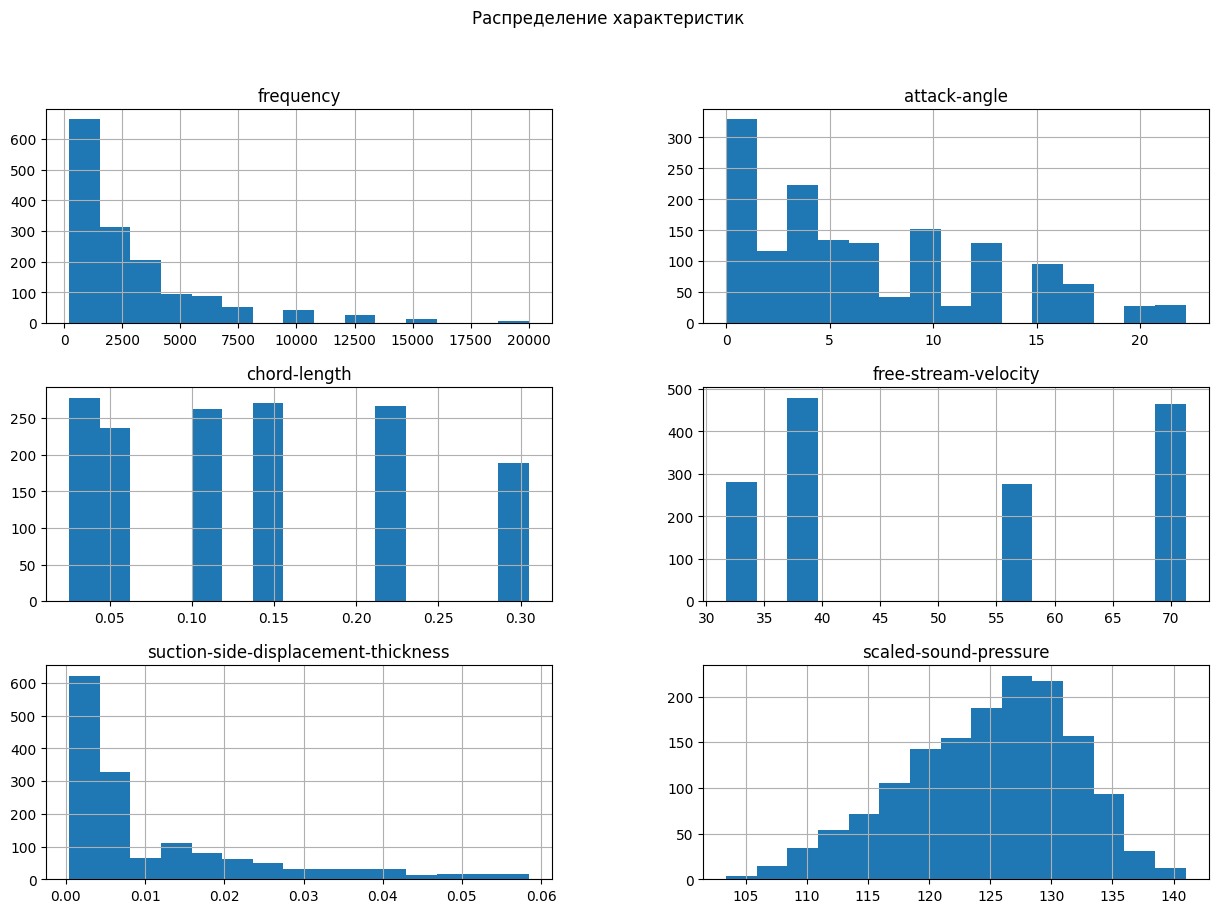

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    blocks = []
    current_block = []

    for line in lines:
        stripped = line.strip()
        if stripped:
            current_block.append(stripped)
        else:
            if current_block:
                blocks.append(current_block)
                current_block = []
    
    if current_block:
        blocks.append(current_block)

    dfs = []
    for block in blocks:
        data = [list(map(float, row.split())) for row in block]
        df = pd.DataFrame(data, columns=["frequency", "attack-angle", "chord-length", "free-stream-velocity", "suction-side-displacement-thickness", "scaled-sound-pressure"])
        dfs.append(df)
        

    full_df = pd.concat(dfs, ignore_index=True)
    return full_df

file_path = "airfoil_self_noise.dat"
data = load_data_from_file(file_path)

data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Распределение характеристик")
plt.show()

Итак мы можем выделить:

Распределение frequency имеет сильный перекос в сторону низких частот (много данных в диапазоне 200–2500), что говорит о концентрации экспериментов в низкочастотном диапазоне. Очень мало наблюдений для частот выше 10000.

Большинство углов атаки сосредоточено в диапазоне 0°–10°

Распределение chord-length является дискретным, с четкими группами значений длины хорды (0,05, 0,1, 0,2 и т. д.). Это указывает на то, что эксперименты проводились с фиксированными размерами моделей.

Наблюдается экспоненциальное убывание толщины смещения, где большинство значений находятся в диапазоне менее 0,01, что говорит о тонких пограничных слоях на поверхностях.

Давление звука имеет нормальное распределение, сосредоточенное в диапазоне 120–130, что типично для акустических испытаний.

Высокие частоты (frequency) могут быть связаны с ростом scaled-sound-pressure.

attack-angle вероятно коррелируют с акустическими эффектами и турбулентностью, что может отразиться на suction-side-displacement-thickness и scaled-sound-pressure.

free-stream-velocity имеет выраженные дискретные значения и, возможно, влияет на все остальные переменные (например, толщину смещения и звук).

Для более подробного анализа мы построим также графики взаимосвязи:

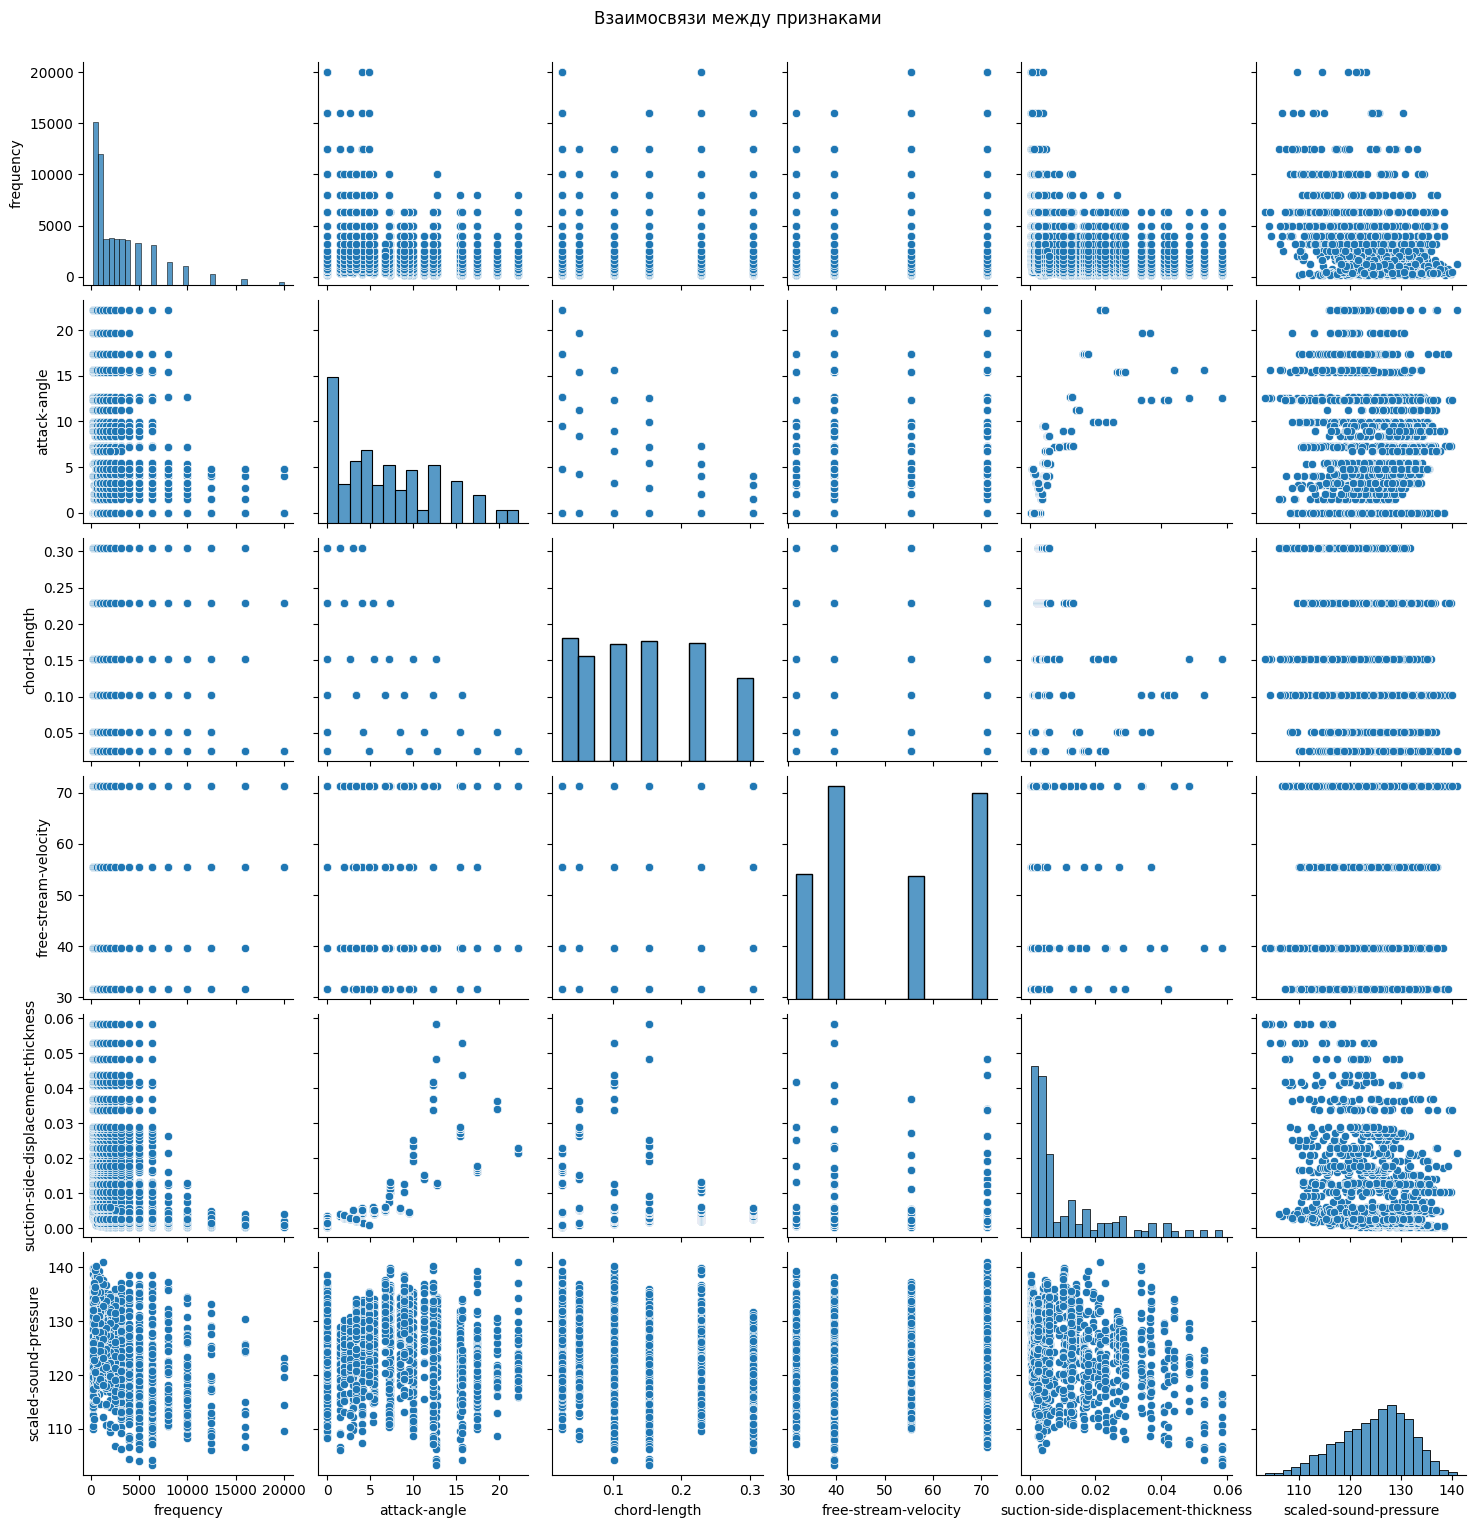

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    blocks = []
    current_block = []

    for line in lines:
        stripped = line.strip()
        if stripped:
            current_block.append(stripped)
        else:
            if current_block:
                blocks.append(current_block)
                current_block = []
    
    if current_block:
        blocks.append(current_block)

    dfs = []
    for block in blocks:
        data = [list(map(float, row.split())) for row in block]
        df = pd.DataFrame(data, columns=["frequency", "attack-angle", "chord-length", "free-stream-velocity", "suction-side-displacement-thickness", "scaled-sound-pressure"])
        dfs.append(df)
        

    full_df = pd.concat(dfs, ignore_index=True)
    return full_df

file_path = "airfoil_self_noise.dat"
data = load_data_from_file(file_path)

sns.pairplot(data)
plt.suptitle("Взаимосвязи между признаками", y=1.02)
plt.show()

Итак мы получили следующие результаты:

С увеличением attack-angle frequency имеет тенденцию увеличиваться.

Заметна зависимость от free-stream-velocity - чем выше скорость, тем больше частота.

attack-angle имеет положительную зависимость от scaled-sound-pressure. С увеличением attack-angle увеличивается scaled-sound-pressure.

Видна отрицательная корреляция free-stream-velocity с suction-side-displacement-thickness. При увеличении скорости толщина смещения уменьшается. Также видна умеренная положительная корреляция с scaled-sound-pressure.

suction-side-displacement-thickness имеют отрицательную корреляцию с scaled-sound-pressure. Чем больше толщина смещения, тем меньше давление.

scaled-sound-pressure имеет сильную зависимость от attack-angle и free-stream-velocity.

Наконец создадим матрицу кореляции:

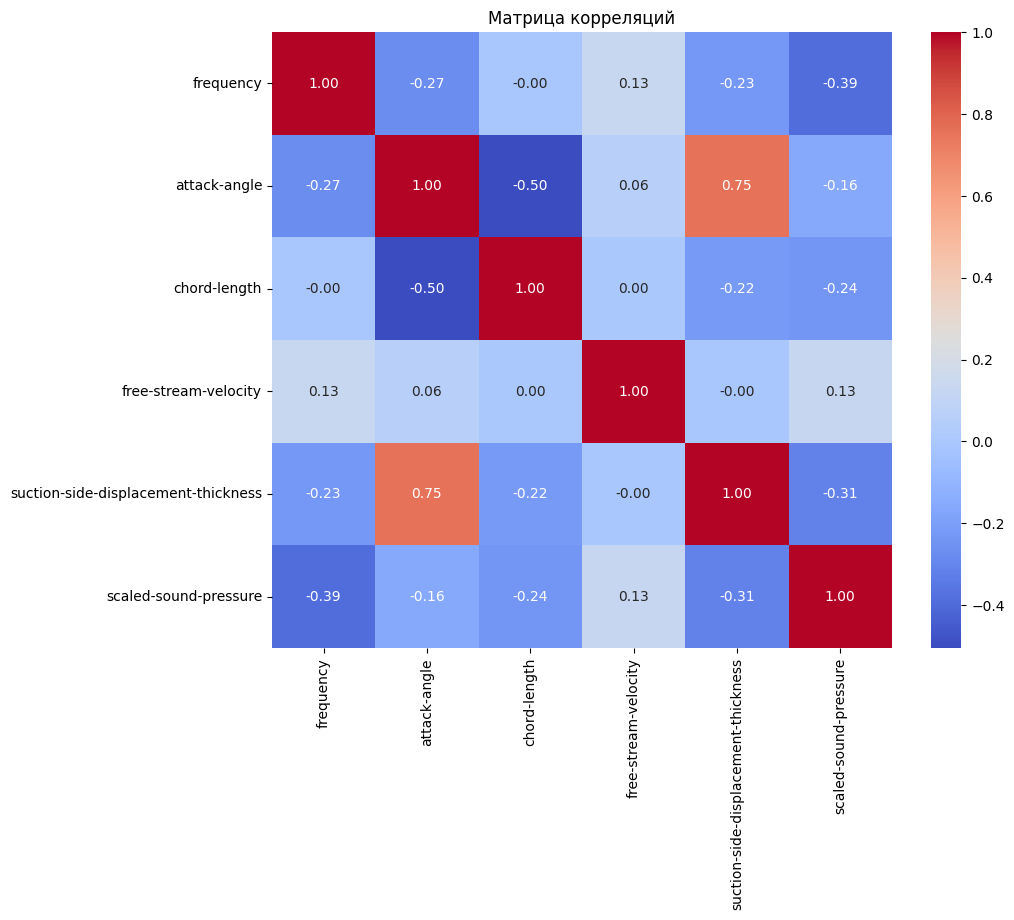

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    blocks = []
    current_block = []

    for line in lines:
        stripped = line.strip()
        if stripped:
            current_block.append(stripped)
        else:
            if current_block:
                blocks.append(current_block)
                current_block = []
    
    if current_block:
        blocks.append(current_block)

    dfs = []
    for block in blocks:
        data = [list(map(float, row.split())) for row in block]
        df = pd.DataFrame(data, columns=["frequency", "attack-angle", "chord-length", "free-stream-velocity", "suction-side-displacement-thickness", "scaled-sound-pressure"])
        dfs.append(df)
        

    full_df = pd.concat(dfs, ignore_index=True)
    return full_df

file_path = "airfoil_self_noise.dat"
data = load_data_from_file(file_path)

correlations = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

frequency с attack-angle имеют слабую отрицательную корреляцию (-0,27). Это указывает на небольшое снижение частоты с увеличением угла атаки. С suction-side-displacement-thickness имеет слабую отрицательную корреляцию (-0,23), подтверждающая вывод о том, что увеличение толщины смещения связано с уменьшением частоты. С scaled-sound-pressure имеет умеренную отрицательную корреляцию (-0,39). Частота уменьшается с ростом давления.

attack-angle имеет с suction-side-displacement-thickness высокую положительную корреляцию (0,75). Это означает, что увеличение угла атаки связано с увеличением толщины смещения.
С chord-length имеет умеренную отрицательнаую корреляцию (-0,50), указывая на то, что при большей длине хорды угол атаки, как правило, меньше.
С scaled-sound-pressure имеет слабую отрицательная корреляция (-0,16) - незначительное снижение давления при увеличении угла атаки.

У free-stream-velocity практически отсутствует связь с другими параметрами (все коэффициенты близки к 0). Линейная зависимость скорости потока от других переменных незначительна.

suction-side-displacement-thickness с scaled-sound-pressure имеет умеренную отрицательную корреляцию (-0,31), что подтверждает снижение давления при увеличении толщины смещения.